## Data Preprocessing

#### Importing Required Libraries

In [1]:
#For Importing Data and Visualizing them
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For Feature Selection and Applying ML Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2

#For Splitting Data into Train and Test Set
from sklearn.model_selection import train_test_split

##ML Models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#For Computing Scores of Models
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

#### Import Data

In [2]:
dataset = pd.read_csv('data.csv') 
#Dataset Used : Breast Cancer Wisconsin [From Kaggle] 
#Dataset Url : https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [3]:
dataset.head() #Displaying some rows of dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Data Preprocessing

In [4]:
dataset.shape 

(569, 33)

##### By running the above cell we can see that the dataset contains 32 Features which affects the Label as either Malignant or Benign. As there may be irrelevant features that may not correspond to the correct prediction we use "Feature Selection" methods to obtain Features that are only most prominent

In [5]:
dataset.isnull().sum() #Checking if NULL values exist

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
dataset = dataset.drop(["id","Unnamed: 32"], axis = 1) #Removing NULL Valued Column

### Data Visualization

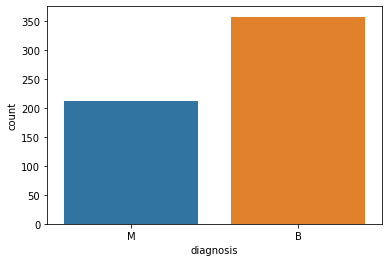

In [7]:
sns.countplot(dataset["diagnosis"]) #Countplot for showing the labels respective counts

In [8]:
X = dataset.drop(["diagnosis"], axis=1)
y = dataset.diagnosis

X = (X - X.mean()) / X.std()

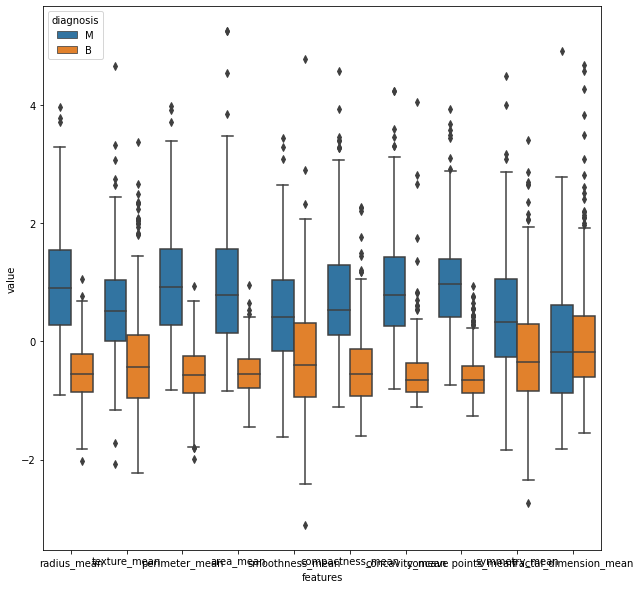

In [9]:
data_1 = pd.concat([y,X.iloc[:,0:10]],axis=1)
data_1 = pd.melt(data_1,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data_1)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

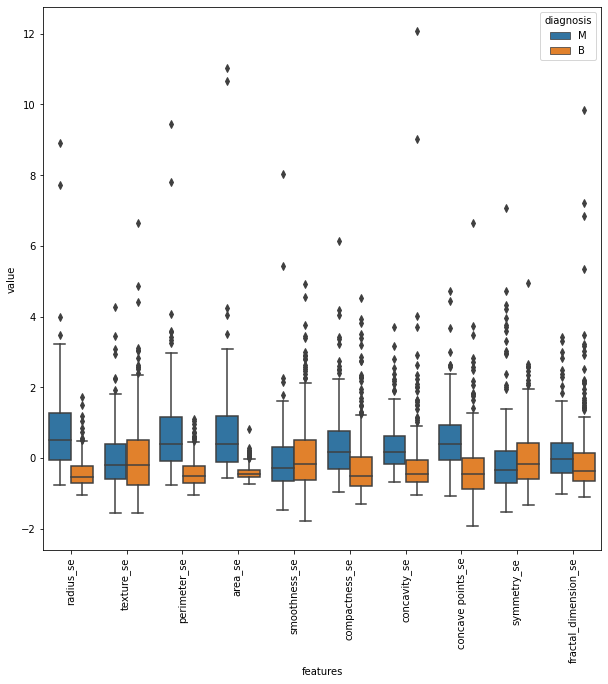

In [10]:
data_1 = pd.concat([y,X.iloc[:,10:20]],axis=1)
data_1 = pd.melt(data_1,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data_1)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

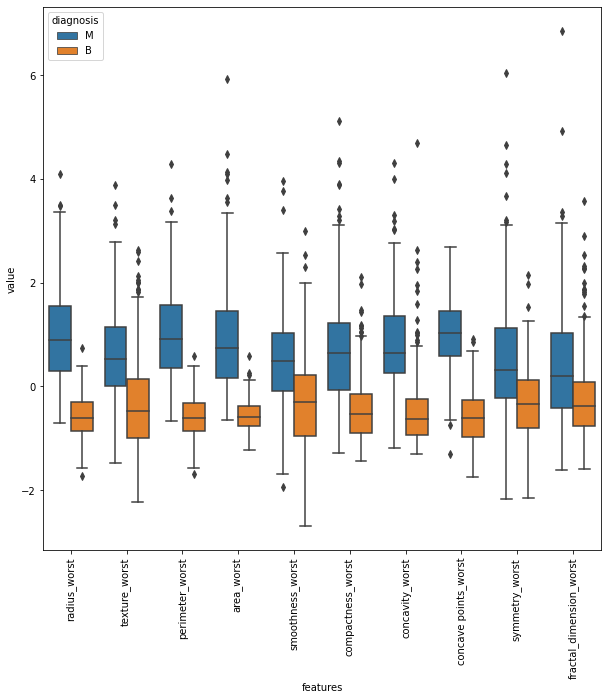

In [11]:
data_1 = pd.concat([y,X.iloc[:,20:31]],axis=1)
data_1 = pd.melt(data_1,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data_1)
plt.xticks(rotation=90)

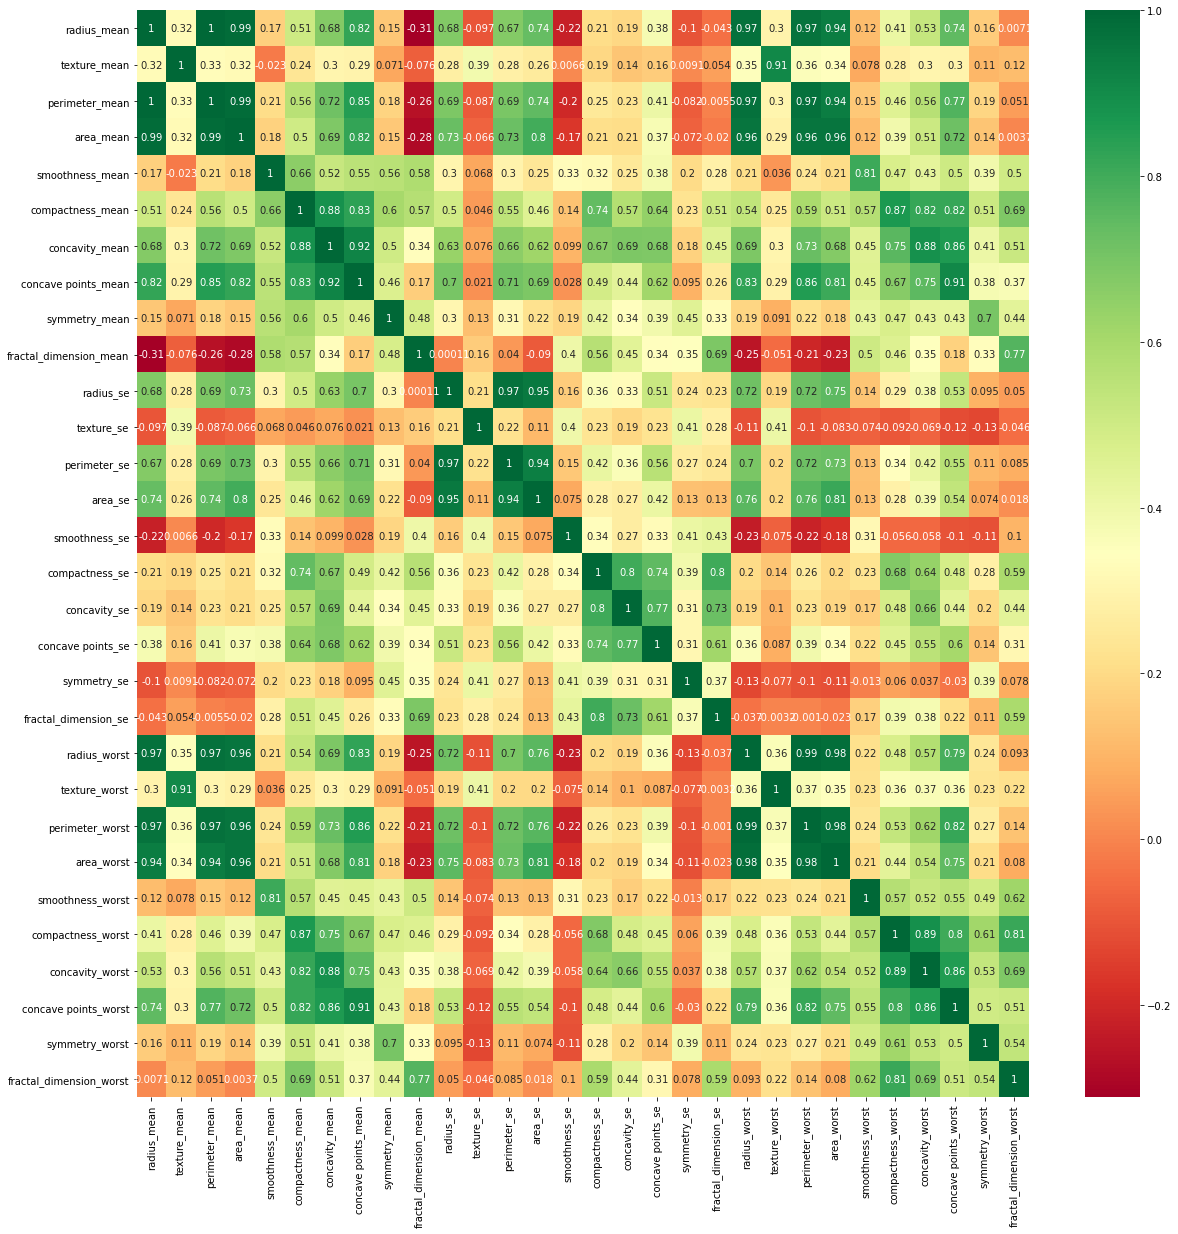

In [12]:
#HeatMap, for understanding the correlation between the features
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Feature Selection using RandomForest Classifier

In [13]:
X = dataset.drop(["diagnosis"], axis=1)
y = dataset["diagnosis"]

In [14]:
#Feature Importance using RandomForestClassifier
sel = SelectFromModel(RandomForestClassifier(random_state=42))
sel.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(random_state=42))

In [15]:
sel.get_support()

array([ True, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False,  True,
        True, False, False])

In [16]:
selected_features= X.columns[(sel.get_support())]
len(selected_features)

10

In [17]:
print('\n'.join(selected_features))

radius_mean
perimeter_mean
area_mean
concavity_mean
concave points_mean
radius_worst
perimeter_worst
area_worst
concavity_worst
concave points_worst


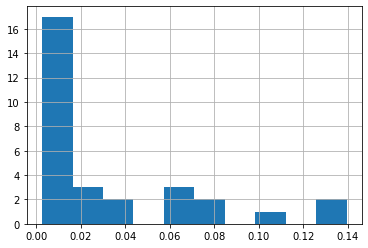

In [18]:
pd.Series(sel.estimator_.feature_importances_.ravel()).hist() #Histogram for the selected Features

### Feature Selection using Univariate Model(Chi-square Test) 

In [19]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfpvalues = pd.DataFrame(fit.pvalues_)


featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featPval = pd.concat([dfcolumns,dfpvalues],axis=1)

featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

featPval.columns = ['Specs', 'P-Values']
print(featPval.nlargest(10, 'P-Values'))

              Specs          Score
23       area_worst  112598.431564
3         area_mean   53991.655924
13          area_se    8758.504705
22  perimeter_worst    3665.035416
2    perimeter_mean    2011.102864
20     radius_worst     491.689157
0       radius_mean     266.104917
12     perimeter_se     250.571896
21    texture_worst     174.449400
1      texture_mean      93.897508
                      Specs  P-Values
9    fractal_dimension_mean  0.993122
18              symmetry_se  0.992847
14            smoothness_se  0.954425
19     fractal_dimension_se  0.936380
11               texture_se  0.921168
4           smoothness_mean  0.698632
29  fractal_dimension_worst  0.630397
8             symmetry_mean  0.611926
17        concave points_se  0.580621
24         smoothness_worst  0.528453


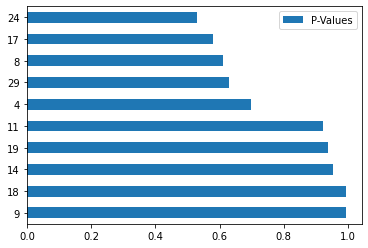

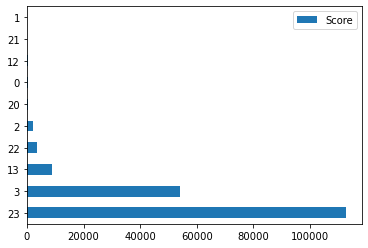

In [20]:
import matplotlib.pyplot as plt
featPval.nlargest(10, 'P-Values').plot(kind='barh')
plt.show()
featureScores.nlargest(10, 'Score').plot(kind='barh')
plt.show()

#### Applying Cross Validation on multiple Machine Learning Models

#### Run the below cell if the features to be used are selected by Random Forest Feature Selection 

In [21]:
#RandomForest Selected Features
X = dataset[selected_features]
y = dataset["diagnosis"]

In [22]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler 
sc_X=StandardScaler()
X = sc_X.fit_transform(X)

#Label Encoding Categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#Splitting Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### The below cells are different algorithms that are going to be applied on the given dataset using EITHER Random Forest Feature Selected or Univariate Feature Selected Features

In [23]:
#SVM with different Hyperparameters
svm_clf = SVC(kernel = 'linear')
scores = cross_val_score(svm_clf, X, y, cv=15)
print("----------------------SVM linear-kernel----------------------")
print("SVM linear-kernel: ", scores.mean())

svm_clf.fit(X_train,y_train)
y_pred = svm_clf.predict(X_test)
conf_mat = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:")
print(conf_mat)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_pred,y_test))

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
print('Accuracy            Precision                Recall')
for i in range(2,21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    svm_clf = SVC(kernel = 'linear')
    svm_clf.fit(X_train,y_train)
    y_pred = svm_clf.predict(X_test)
    print(accuracy_score(y_test, y_pred),'  \t',precision_score(y_test, y_pred),'   \t',recall_score(y_test, y_pred))

#Random Forest Classifier
rnd_clf = RandomForestClassifier()
scores = cross_val_score(rnd_clf, X, y, cv=15)
print("----------------------Random Forest----------------------")
print("Random Forest: ", scores.mean())

rnd_clf.fit(X_train,y_train)
y_pred = rnd_clf.predict(X_test)
conf_mat = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:")
print(conf_mat)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_pred,y_test))

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
print('Accuracy            Precision                Recall')
for i in range(2,21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    rnd_clf = RandomForestClassifier()
    rnd_clf.fit(X_train,y_train)
    y_pred = rnd_clf.predict(X_test)
    print(accuracy_score(y_test, y_pred),'  \t',precision_score(y_test, y_pred),'   \t',recall_score(y_test, y_pred))

# decision Tress
dtC = DecisionTreeClassifier()
scores = cross_val_score(dtC, X, y, cv=15)
print("----------------------Decision Tree----------------------")
print("Decision Tree: ", scores.mean())

dtC.fit(X_train,y_train)
y_pred = dtC.predict(X_test)
conf_mat = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:")
print(conf_mat)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_pred,y_test))

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
print('Accuracy            Precision                Recall')
for i in range(2,21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    dtC = DecisionTreeClassifier()
    dtC.fit(X_train,y_train)
    y_pred = dtC.predict(X_test)
    print(accuracy_score(y_test, y_pred),'  \t',precision_score(y_test, y_pred),'   \t',recall_score(y_test, y_pred))

#Naive Bayes Classifer
byes_clf = GaussianNB()
scores = cross_val_score(byes_clf, X, y, cv=15)
print("----------------------Guassian Naive Bayes----------------------")
print("Guassian NB: ", scores.mean())

byes_clf.fit(X_train,y_train)
y_pred = byes_clf.predict(X_test)
conf_mat = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:")
print(conf_mat)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_pred,y_test))

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
print('Accuracy            Precision                Recall')
for i in range(2,21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    byes_clf = GaussianNB()
    byes_clf.fit(X_train,y_train)
    y_pred = byes_clf.predict(X_test)
    print(accuracy_score(y_test, y_pred),'  \t',precision_score(y_test, y_pred),'   \t',recall_score(y_test, y_pred))

print("----------------------K-Nearest Neighbors----------------------")
K = [] 
training = [] 
test = [] 
scores = {} 
  
for k in range(2, 21): 
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(X_train, y_train) 
  
    training_score = clf.score(X_train, y_train) 
    test_score = clf.score(X_test, y_test) 
    K.append(k) 
  
    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score] 

for keys, values in scores.items(): 
    print(keys, ':', values) 

clf = KNeighborsClassifier(n_neighbors = 2) 
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
conf_mat = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:")
print(conf_mat)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_pred,y_test))

----------------------SVM linear-kernel----------------------
SVM linear-kernel:  0.9578473210052157
Confusion Matrix:
[[68  2]
 [ 1 43]]
Accuracy:  0.9736842105263158
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        70
           1       0.96      0.98      0.97        44

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy            Precision                Recall
0.9824561403508771   	 1.0    	 0.9591836734693877
0.9736842105263158   	 0.975    	 0.9512195121951219
0.9649122807017544   	 0.9318181818181818    	 0.9761904761904762
0.9649122807017544   	 0.9772727272727273    	 0.9347826086956522
0.9385964912280702   	 0.9318181818181818    	 0.9111111111111111
0.9473684210526315   	 0.9545454545454546    	 0.9130434782608695
0.9824561403508771   	 1.0    	 0.9565217391304348
0.9736842105263158   	 0.978723404

#### Run the below cell if the features to be used are selected by Univariate Method Feature Selection

In [24]:
#Univariate Method Feature Selection
features = featureScores.nlargest(10,'Score')
selected_uni = []
for i in features['Specs']:
    selected_uni.append(i)
    
X = dataset[selected_uni]
y = dataset["diagnosis"]

In [25]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler 
sc_X=StandardScaler()
X = sc_X.fit_transform(X)

#Label Encoding Categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#Splitting Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
#SVM with different Hyperparameters
svm_clf = SVC(kernel = 'linear')
scores = cross_val_score(svm_clf, X, y, cv=15)
print("----------------------SVM linear-kernel----------------------")
print("SVM linear-kernel: ", scores.mean())

svm_clf.fit(X_train,y_train)
y_pred = svm_clf.predict(X_test)
conf_mat = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:")
print(conf_mat)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_pred,y_test))

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
print('Accuracy            Precision                Recall')
for i in range(2,21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    svm_clf = SVC(kernel = 'linear')
    svm_clf.fit(X_train,y_train)
    y_pred = svm_clf.predict(X_test)
    print(accuracy_score(y_test, y_pred),'  \t',precision_score(y_test, y_pred),'   \t',recall_score(y_test, y_pred))

#Random Forest Classifier
rnd_clf = RandomForestClassifier()
scores = cross_val_score(rnd_clf, X, y, cv=15)
print("----------------------Random Forest----------------------")
print("Random Forest: ", scores.mean())

rnd_clf.fit(X_train,y_train)
y_pred = rnd_clf.predict(X_test)
conf_mat = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:")
print(conf_mat)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_pred,y_test))

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
print('Accuracy            Precision                Recall')
for i in range(2,21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    rnd_clf = RandomForestClassifier()
    rnd_clf.fit(X_train,y_train)
    y_pred = rnd_clf.predict(X_test)
    print(accuracy_score(y_test, y_pred),'  \t',precision_score(y_test, y_pred),'   \t',recall_score(y_test, y_pred))

# decision Tress
dtC = DecisionTreeClassifier()
scores = cross_val_score(dtC, X, y, cv=15)
print("----------------------Decision Tree----------------------")
print("Decision Tree: ", scores.mean())

dtC.fit(X_train,y_train)
y_pred = dtC.predict(X_test)
conf_mat = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:")
print(conf_mat)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_pred,y_test))

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
print('Accuracy            Precision                Recall')
for i in range(2,21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    dtC = DecisionTreeClassifier()
    dtC.fit(X_train,y_train)
    y_pred = dtC.predict(X_test)
    print(accuracy_score(y_test, y_pred),'  \t',precision_score(y_test, y_pred),'   \t',recall_score(y_test, y_pred))

#Naive Bayes Classifer
byes_clf = GaussianNB()
scores = cross_val_score(byes_clf, X, y, cv=15)
print("----------------------Guassian Naive Bayes----------------------")
print("Guassian NB: ", scores.mean())

byes_clf.fit(X_train,y_train)
y_pred = byes_clf.predict(X_test)
conf_mat = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:")
print(conf_mat)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_pred,y_test))

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
print('Accuracy            Precision                Recall')
for i in range(2,21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    byes_clf = GaussianNB()
    byes_clf.fit(X_train,y_train)
    y_pred = byes_clf.predict(X_test)
    print(accuracy_score(y_test, y_pred),'  \t',precision_score(y_test, y_pred),'   \t',recall_score(y_test, y_pred))

print("----------------------K-Nearest Neighbors----------------------")
K = [] 
training = [] 
test = [] 
scores = {} 
  
for k in range(2, 21): 
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(X_train, y_train) 
  
    training_score = clf.score(X_train, y_train) 
    test_score = clf.score(X_test, y_test) 
    K.append(k) 
  
    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score] 

for keys, values in scores.items(): 
    print(keys, ':', values) 

clf = KNeighborsClassifier(n_neighbors = 2) 
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
conf_mat = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:")
print(conf_mat)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_pred,y_test))

----------------------SVM linear-kernel----------------------
SVM linear-kernel:  0.9419630156472262
Confusion Matrix:
[[60  4]
 [ 3 47]]
Accuracy:  0.9385964912280702
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        64
           1       0.92      0.94      0.93        50

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

Accuracy            Precision                Recall
0.9122807017543859   	 0.9459459459459459    	 0.813953488372093
0.9385964912280702   	 0.9487179487179487    	 0.8809523809523809
0.956140350877193   	 0.9803921568627451    	 0.9259259259259259
0.9298245614035088   	 0.9487179487179487    	 0.8604651162790697
0.9122807017543859   	 0.9512195121951219    	 0.8297872340425532
0.9298245614035088   	 0.8648648648648649    	 0.9142857142857143
0.9298245614035088   	 1.0    	 0.8181818181818182
0.929824

##### From the above scores, it is clear that SVM with a LINEAR KERNEL performs better on the dataset. So we apply SVM with LINEAR KERNEL model to our dataset with features that are selected by Random Forest Classifier.

In [27]:
#RandomForest Selected Features
X = dataset[selected_features]
y = dataset["diagnosis"]

In [28]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler 
sc_X=StandardScaler()
X = sc_X.fit_transform(X)

#Label Encoding Categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#Splitting Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [29]:
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [30]:
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_pred,y_test))

Confusion Matrix:
[[72  1]
 [ 3 38]]
Accuracy:  0.9649122807017544
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        75
           1       0.93      0.97      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

